In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor


In [5]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [17]:
df.drop(columns='Unnamed: 0',inplace=True)

In [18]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


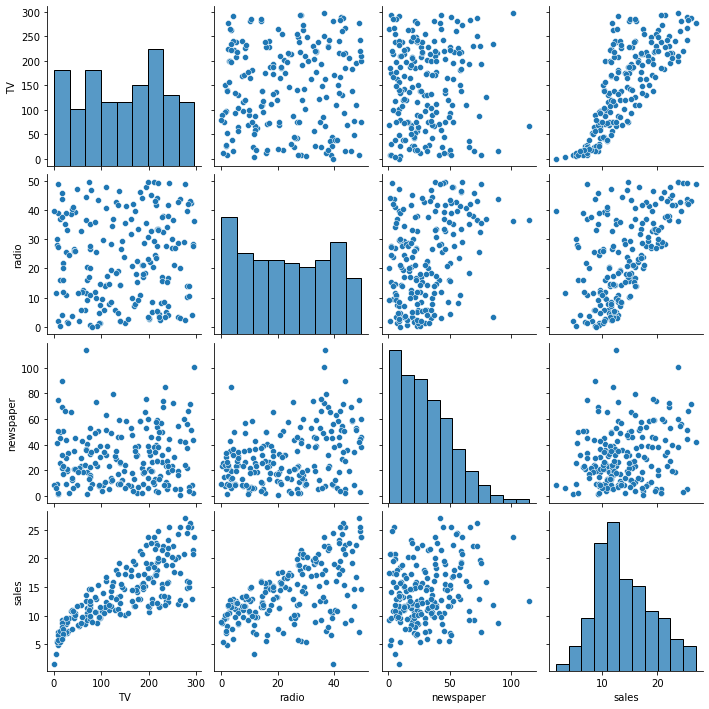

In [23]:
sns.pairplot(df)

TV              AxesSubplot(0.125,0.536818;0.352273x0.343182)
radio        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
newspaper          AxesSubplot(0.125,0.125;0.352273x0.343182)
sales           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

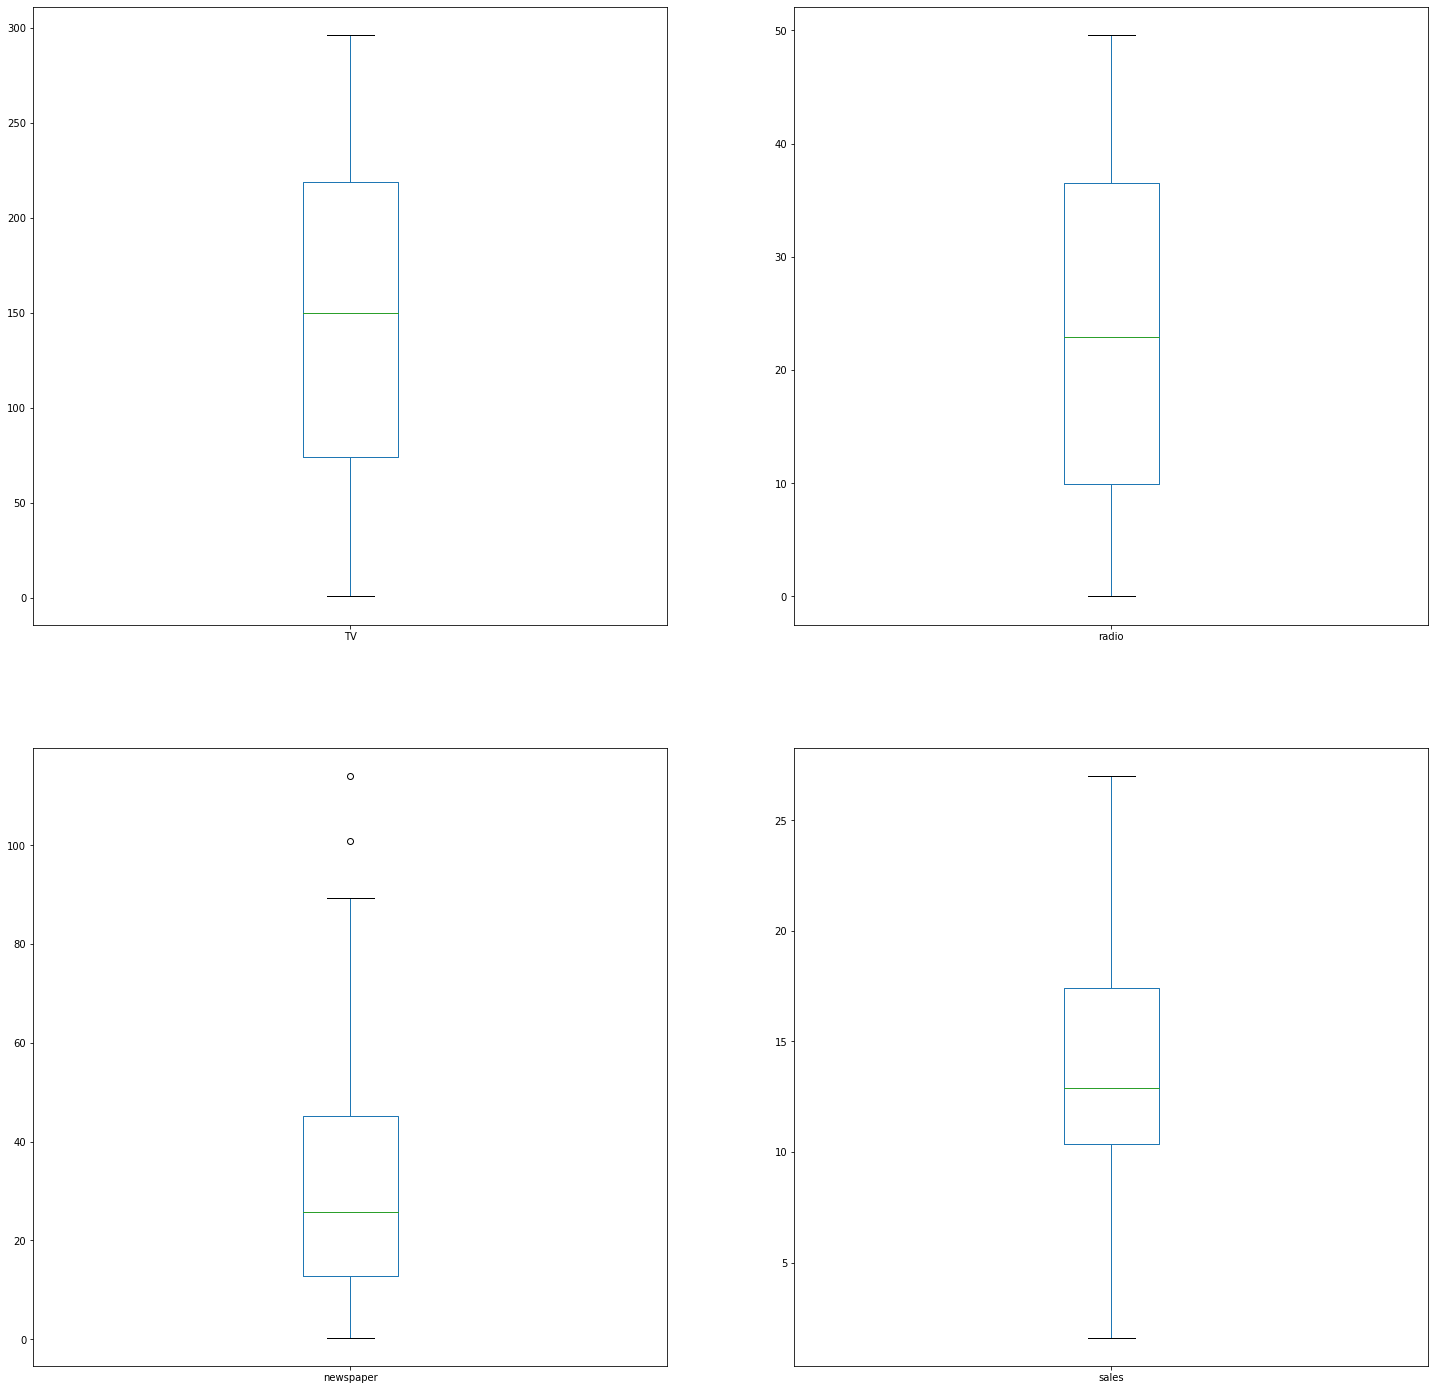

In [26]:
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(25,25))

-0.06932836662244649


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

0.0934668451108453
0.8879959753085498
0.4045082487061191


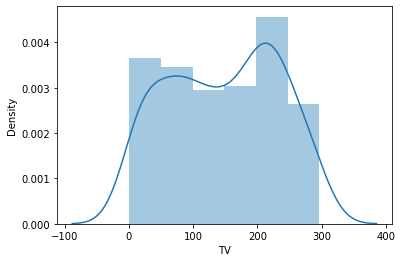

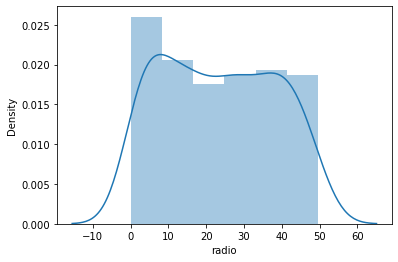

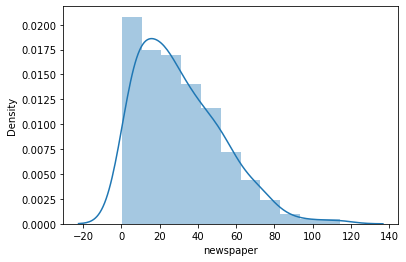

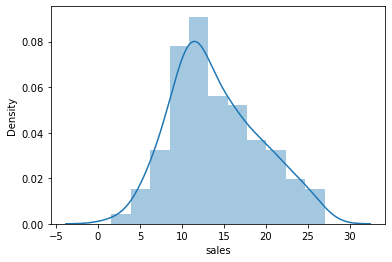

In [29]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [30]:
df_corr=df.corr().abs()
df_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


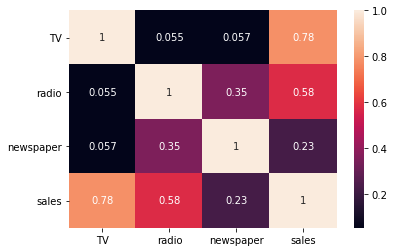

In [31]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [33]:
X=df.drop(columns="sales")
Y=df["sales"]

In [38]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


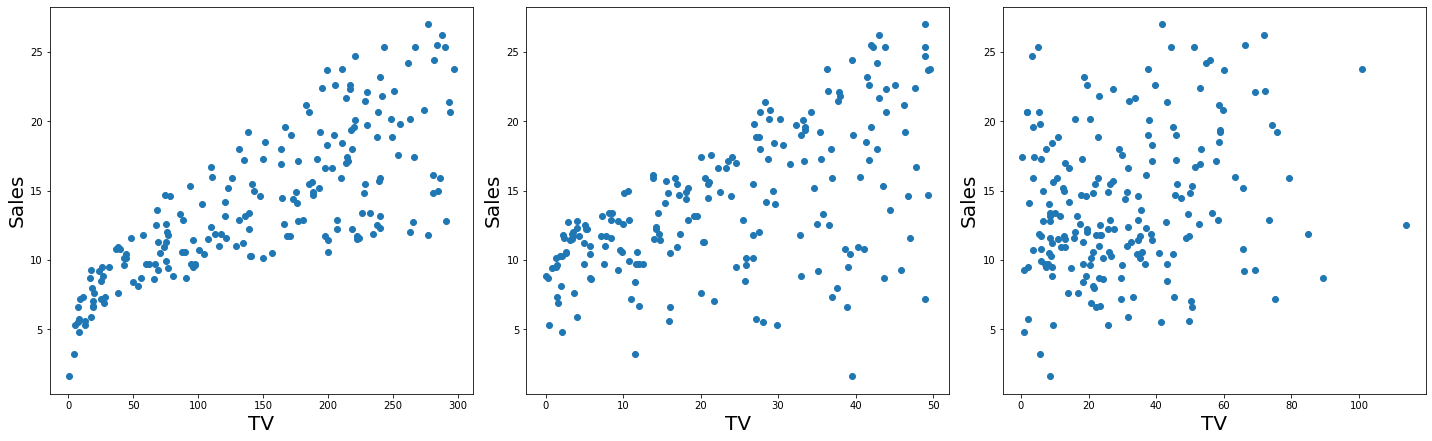

In [52]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Sales',fontsize=20)
    pltnumber+=1
plt.tight_layout()

In [54]:
lm=smf.ols(formula='Y~X',data=df).fit()

In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        17:57:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.SINCE THERE IS A NEGATIVE CORELATION BETWEEN SALES AND NEWSPAPER AND PVALUE IS GREATER THAN 0.05, SO DROP NEWS PAPAER COLUMN

In [58]:
df.drop(columns="newspaper",inplace=True)

In [59]:
df

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [63]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [68]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [69]:
Y_pred=lm.predict(X_test)
Y_pred_train=lm.predict(X_train)

In [72]:
lm.score(X_train,Y_train)


0.8851029461177776

In [73]:
lm.score(X_test,Y_test)

0.9219136041031583

In [81]:
r2=r2_score(Y_test,Y_pred)
r2

0.9219136041031583

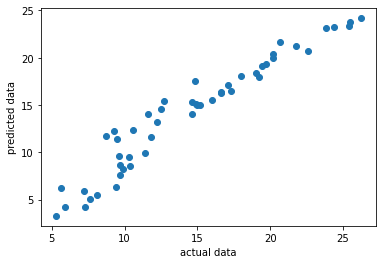

In [90]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# LINEAR REGRESSION USING RIDGE REGRESSION

In [84]:
ridge=Ridge()

In [85]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)


In [86]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [88]:
print(ridge_regressor.best_params_)

{'alpha': 1}


In [89]:
print(ridge_regressor.best_score_)

0.8680428011230573


In [91]:
ridge_regressor.score(X_test,Y_test)

0.9226856952386469

# MODEL USING KNN

In [96]:
X=df.drop(columns="sales")
Y=df["sales"]

In [97]:
scaler=StandardScaler()

In [98]:
X_scaled=scaler.fit_transform(X)

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [103]:
knn=KNeighborsRegressor()

In [104]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [105]:
Y_pred=knn.predict(X_test)

In [107]:
knn.score(X_train,Y_train)

0.9790337536014582

In [108]:
knn.score(X_test,Y_test)

0.9886332177670175

In [109]:
r2=r2_score(Y_test,Y_pred)
r2

0.9886332177670175

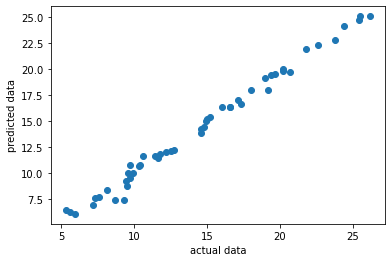

In [110]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# KNN MODEL USING HYPERPARAMETER TUNING

In [111]:
X=df.drop(columns="sales")
Y=df["sales"]

In [112]:
scaler=StandardScaler()

In [113]:
X_scaled=scaler.fit_transform(X)

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [116]:
knn=KNeighborsRegressor()

In [117]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [118]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [119]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [120]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 3}

In [121]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [122]:
clf.score(X_train,Y_train)

0.9871573850331801

In [123]:
clf.score(X_test,Y_test)

0.9857864001296816

In [124]:
r2=r2_score(Y_test,Y_pred)
r2

0.9857864001296816

# DECISION TREE MODEL

In [127]:
X=df.drop(columns="sales")
Y=df["sales"]

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [129]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [130]:
Y_pred=dt.predict(X_test)

In [131]:
dt.score(X_train,Y_train)

1.0

In [132]:
dt.score(X_test,Y_test)

0.9677614306793216

In [133]:
r2=r2_score(Y_test,Y_pred)
r2

0.9677614306793216

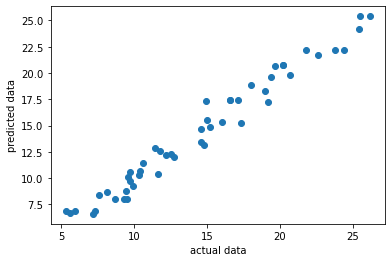

In [134]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# DECISION TREE WITH HYPER PARAMETER TUNING

In [136]:
X=df.drop(columns="sales")
Y=df["sales"]

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [138]:
dt=DecisionTreeRegressor()


In [143]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [144]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1)

In [145]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [146]:
clf.best_params_

{'criterion': 'mae',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [148]:
Y_pred=clf.predict(X_test)


In [151]:
clf.score(X_train,Y_train)

0.9821786799343343

In [152]:
clf.score(X_test,Y_test)

0.9355289671482873

In [153]:
r2=r2_score(Y_test,Y_pred)
r2

0.9355289671482873

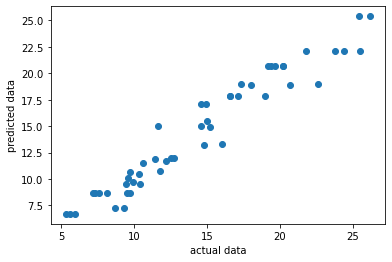

In [154]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [155]:
md=[lm,knn,dt]
import pickle
filename="Advt.pkl"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
1. Conducted 3 models on Advertising dataset namely, Linear Regression, KNN and Desicion Tree with Hyperparameter tuning
2. It comes to a conclusion that Knn model is providing best score for Advt dataset
3. r2_score=0.9857864001296816
